In [40]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf
import os

seed = 0
numpy.random.seed(seed)   # seed 값 설정
tf.set_random_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0])) 

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


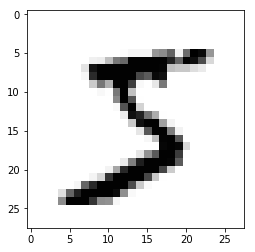

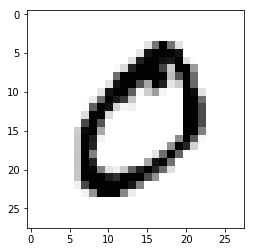

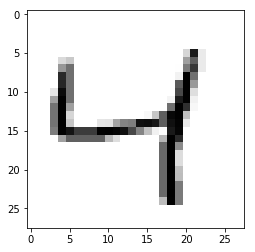

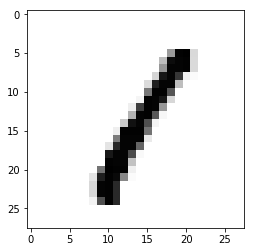

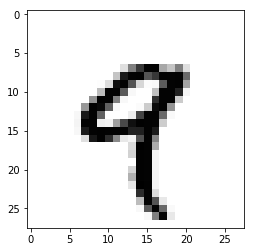

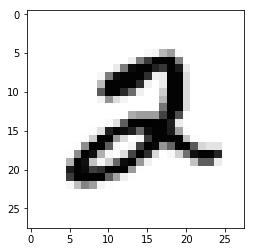

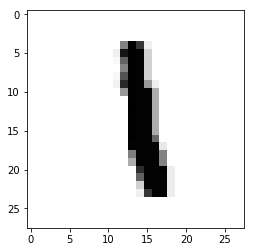

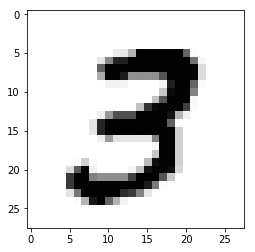

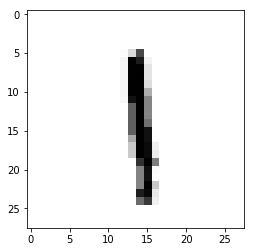

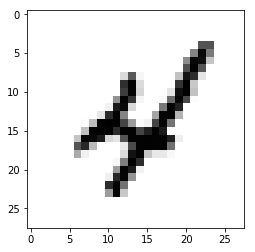

In [41]:
# 그래프로 확인
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

In [42]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [45]:
# 차원 변환 과정
print(X_train.shape)# (60000, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 784)  #28x28 을 1차원 배열로 만들기위한 설정
print(X_train.shape)# (60000, 784)

#형변환
X_train = X_train.astype('float64')

#정규화작업진행, 0~255 사이의 값을 0과 1사이의 값으로 바꾸는 작업 
X_train = X_train / 255
print(X_train)

#위 작업을 한번에 작업 
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

(60000, 784)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# 클래스 값 확인
for i in range(len(Y_class_train)):
    print("class %d번 : %d " % (i, Y_class_train[i]))

class 0번 : 5 
class 1번 : 0 
class 2번 : 4 
class 3번 : 1 
class 4번 : 9 
class 5번 : 2 
class 6번 : 1 
class 7번 : 3 
class 8번 : 1 
class 9번 : 4 
class 10번 : 3 
class 11번 : 5 
class 12번 : 3 
class 13번 : 6 
class 14번 : 1 
class 15번 : 7 
class 16번 : 2 
class 17번 : 8 
class 18번 : 6 
class 19번 : 9 
class 20번 : 4 
class 21번 : 0 
class 22번 : 9 
class 23번 : 1 
class 24번 : 1 
class 25번 : 2 
class 26번 : 4 
class 27번 : 3 
class 28번 : 2 
class 29번 : 7 
class 30번 : 3 
class 31번 : 8 
class 32번 : 6 
class 33번 : 9 
class 34번 : 0 
class 35번 : 5 
class 36번 : 6 
class 37번 : 0 
class 38번 : 7 
class 39번 : 6 
class 40번 : 1 
class 41번 : 8 
class 42번 : 7 
class 43번 : 9 
class 44번 : 3 
class 45번 : 9 
class 46번 : 8 
class 47번 : 5 
class 48번 : 9 
class 49번 : 3 
class 50번 : 3 
class 51번 : 0 
class 52번 : 7 
class 53번 : 4 
class 54번 : 9 
class 55번 : 8 
class 56번 : 0 
class 57번 : 9 
class 58번 : 4 
class 59번 : 1 
class 60번 : 4 
class 61번 : 4 
class 62번 : 6 
class 63번 : 0 
class 64번 : 4 
class 65번 : 5 
class 66번 : 6 
class

class 3053번 : 6 
class 3054번 : 2 
class 3055번 : 9 
class 3056번 : 4 
class 3057번 : 3 
class 3058번 : 6 
class 3059번 : 7 
class 3060번 : 7 
class 3061번 : 4 
class 3062번 : 5 
class 3063번 : 9 
class 3064번 : 2 
class 3065번 : 7 
class 3066번 : 8 
class 3067번 : 0 
class 3068번 : 1 
class 3069번 : 9 
class 3070번 : 1 
class 3071번 : 4 
class 3072번 : 4 
class 3073번 : 8 
class 3074번 : 4 
class 3075번 : 3 
class 3076번 : 9 
class 3077번 : 2 
class 3078번 : 2 
class 3079번 : 7 
class 3080번 : 1 
class 3081번 : 7 
class 3082번 : 8 
class 3083번 : 9 
class 3084번 : 9 
class 3085번 : 5 
class 3086번 : 8 
class 3087번 : 7 
class 3088번 : 4 
class 3089번 : 6 
class 3090번 : 9 
class 3091번 : 4 
class 3092번 : 4 
class 3093번 : 8 
class 3094번 : 8 
class 3095번 : 9 
class 3096번 : 6 
class 3097번 : 6 
class 3098번 : 6 
class 3099번 : 9 
class 3100번 : 4 
class 3101번 : 4 
class 3102번 : 2 
class 3103번 : 1 
class 3104번 : 9 
class 3105번 : 2 
class 3106번 : 0 
class 3107번 : 0 
class 3108번 : 3 
class 3109번 : 6 
class 3110번 : 4 
class 3111번 : 

class 5971번 : 5 
class 5972번 : 8 
class 5973번 : 6 
class 5974번 : 3 
class 5975번 : 7 
class 5976번 : 7 
class 5977번 : 8 
class 5978번 : 0 
class 5979번 : 9 
class 5980번 : 3 
class 5981번 : 0 
class 5982번 : 4 
class 5983번 : 1 
class 5984번 : 5 
class 5985번 : 2 
class 5986번 : 7 
class 5987번 : 3 
class 5988번 : 2 
class 5989번 : 4 
class 5990번 : 6 
class 5991번 : 5 
class 5992번 : 9 
class 5993번 : 6 
class 5994번 : 1 
class 5995번 : 7 
class 5996번 : 6 
class 5997번 : 8 
class 5998번 : 6 
class 5999번 : 9 
class 6000번 : 6 
class 6001번 : 0 
class 6002번 : 1 
class 6003번 : 1 
class 6004번 : 5 
class 6005번 : 2 
class 6006번 : 8 
class 6007번 : 3 
class 6008번 : 0 
class 6009번 : 4 
class 6010번 : 9 
class 6011번 : 5 
class 6012번 : 2 
class 6013번 : 6 
class 6014번 : 7 
class 6015번 : 7 
class 6016번 : 3 
class 6017번 : 8 
class 6018번 : 5 
class 6019번 : 9 
class 6020번 : 1 
class 6021번 : 1 
class 6022번 : 8 
class 6023번 : 0 
class 6024번 : 6 
class 6025번 : 4 
class 6026번 : 5 
class 6027번 : 5 
class 6028번 : 4 
class 6029번 : 

class 8578번 : 1 
class 8579번 : 4 
class 8580번 : 4 
class 8581번 : 9 
class 8582번 : 2 
class 8583번 : 4 
class 8584번 : 8 
class 8585번 : 9 
class 8586번 : 9 
class 8587번 : 4 
class 8588번 : 1 
class 8589번 : 1 
class 8590번 : 6 
class 8591번 : 2 
class 8592번 : 9 
class 8593번 : 2 
class 8594번 : 7 
class 8595번 : 1 
class 8596번 : 7 
class 8597번 : 3 
class 8598번 : 2 
class 8599번 : 2 
class 8600번 : 4 
class 8601번 : 9 
class 8602번 : 1 
class 8603번 : 4 
class 8604번 : 7 
class 8605번 : 3 
class 8606번 : 3 
class 8607번 : 8 
class 8608번 : 9 
class 8609번 : 2 
class 8610번 : 1 
class 8611번 : 2 
class 8612번 : 0 
class 8613번 : 2 
class 8614번 : 2 
class 8615번 : 1 
class 8616번 : 7 
class 8617번 : 2 
class 8618번 : 8 
class 8619번 : 8 
class 8620번 : 9 
class 8621번 : 6 
class 8622번 : 4 
class 8623번 : 5 
class 8624번 : 5 
class 8625번 : 1 
class 8626번 : 9 
class 8627번 : 6 
class 8628번 : 6 
class 8629번 : 7 
class 8630번 : 9 
class 8631번 : 2 
class 8632번 : 2 
class 8633번 : 1 
class 8634번 : 4 
class 8635번 : 3 
class 8636번 : 

class 11728번 : 1 
class 11729번 : 0 
class 11730번 : 6 
class 11731번 : 6 
class 11732번 : 9 
class 11733번 : 7 
class 11734번 : 8 
class 11735번 : 1 
class 11736번 : 7 
class 11737번 : 2 
class 11738번 : 2 
class 11739번 : 5 
class 11740번 : 4 
class 11741번 : 8 
class 11742번 : 0 
class 11743번 : 1 
class 11744번 : 4 
class 11745번 : 9 
class 11746번 : 0 
class 11747번 : 3 
class 11748번 : 2 
class 11749번 : 8 
class 11750번 : 8 
class 11751번 : 8 
class 11752번 : 3 
class 11753번 : 8 
class 11754번 : 0 
class 11755번 : 3 
class 11756번 : 3 
class 11757번 : 7 
class 11758번 : 0 
class 11759번 : 6 
class 11760번 : 1 
class 11761번 : 8 
class 11762번 : 9 
class 11763번 : 7 
class 11764번 : 4 
class 11765번 : 1 
class 11766번 : 7 
class 11767번 : 4 
class 11768번 : 7 
class 11769번 : 6 
class 11770번 : 4 
class 11771번 : 7 
class 11772번 : 2 
class 11773번 : 9 
class 11774번 : 2 
class 11775번 : 9 
class 11776번 : 5 
class 11777번 : 3 
class 11778번 : 7 
class 11779번 : 0 
class 11780번 : 0 
class 11781번 : 3 
class 11782번 : 5 
class 1178

class 15051번 : 6 
class 15052번 : 3 
class 15053번 : 3 
class 15054번 : 5 
class 15055번 : 2 
class 15056번 : 8 
class 15057번 : 2 
class 15058번 : 4 
class 15059번 : 4 
class 15060번 : 0 
class 15061번 : 6 
class 15062번 : 7 
class 15063번 : 9 
class 15064번 : 0 
class 15065번 : 0 
class 15066번 : 5 
class 15067번 : 2 
class 15068번 : 1 
class 15069번 : 5 
class 15070번 : 5 
class 15071번 : 5 
class 15072번 : 9 
class 15073번 : 1 
class 15074번 : 7 
class 15075번 : 3 
class 15076번 : 3 
class 15077번 : 3 
class 15078번 : 4 
class 15079번 : 9 
class 15080번 : 3 
class 15081번 : 7 
class 15082번 : 1 
class 15083번 : 2 
class 15084번 : 6 
class 15085번 : 5 
class 15086번 : 7 
class 15087번 : 7 
class 15088번 : 6 
class 15089번 : 9 
class 15090번 : 3 
class 15091번 : 8 
class 15092번 : 4 
class 15093번 : 2 
class 15094번 : 2 
class 15095번 : 1 
class 15096번 : 8 
class 15097번 : 3 
class 15098번 : 7 
class 15099번 : 1 
class 15100번 : 4 
class 15101번 : 3 
class 15102번 : 8 
class 15103번 : 0 
class 15104번 : 8 
class 15105번 : 1 
class 1510

class 18050번 : 1 
class 18051번 : 9 
class 18052번 : 6 
class 18053번 : 1 
class 18054번 : 4 
class 18055번 : 0 
class 18056번 : 4 
class 18057번 : 9 
class 18058번 : 6 
class 18059번 : 3 
class 18060번 : 9 
class 18061번 : 3 
class 18062번 : 4 
class 18063번 : 6 
class 18064번 : 0 
class 18065번 : 2 
class 18066번 : 7 
class 18067번 : 5 
class 18068번 : 6 
class 18069번 : 3 
class 18070번 : 1 
class 18071번 : 4 
class 18072번 : 1 
class 18073번 : 0 
class 18074번 : 1 
class 18075번 : 1 
class 18076번 : 6 
class 18077번 : 2 
class 18078번 : 8 
class 18079번 : 3 
class 18080번 : 5 
class 18081번 : 4 
class 18082번 : 9 
class 18083번 : 5 
class 18084번 : 2 
class 18085번 : 6 
class 18086번 : 7 
class 18087번 : 7 
class 18088번 : 4 
class 18089번 : 8 
class 18090번 : 5 
class 18091번 : 9 
class 18092번 : 4 
class 18093번 : 0 
class 18094번 : 6 
class 18095번 : 1 
class 18096번 : 6 
class 18097번 : 2 
class 18098번 : 4 
class 18099번 : 3 
class 18100번 : 7 
class 18101번 : 4 
class 18102번 : 0 
class 18103번 : 5 
class 18104번 : 8 
class 1810

class 21050번 : 7 
class 21051번 : 1 
class 21052번 : 1 
class 21053번 : 2 
class 21054번 : 1 
class 21055번 : 3 
class 21056번 : 3 
class 21057번 : 4 
class 21058번 : 5 
class 21059번 : 5 
class 21060번 : 1 
class 21061번 : 6 
class 21062번 : 7 
class 21063번 : 7 
class 21064번 : 0 
class 21065번 : 8 
class 21066번 : 0 
class 21067번 : 9 
class 21068번 : 1 
class 21069번 : 0 
class 21070번 : 1 
class 21071번 : 1 
class 21072번 : 9 
class 21073번 : 2 
class 21074번 : 6 
class 21075번 : 3 
class 21076번 : 4 
class 21077번 : 4 
class 21078번 : 0 
class 21079번 : 5 
class 21080번 : 3 
class 21081번 : 6 
class 21082번 : 0 
class 21083번 : 7 
class 21084번 : 6 
class 21085번 : 8 
class 21086번 : 7 
class 21087번 : 9 
class 21088번 : 1 
class 21089번 : 8 
class 21090번 : 1 
class 21091번 : 9 
class 21092번 : 3 
class 21093번 : 5 
class 21094번 : 1 
class 21095번 : 7 
class 21096번 : 4 
class 21097번 : 0 
class 21098번 : 3 
class 21099번 : 3 
class 21100번 : 6 
class 21101번 : 1 
class 21102번 : 3 
class 21103번 : 6 
class 21104번 : 8 
class 2110

class 24549번 : 9 
class 24550번 : 7 
class 24551번 : 2 
class 24552번 : 2 
class 24553번 : 9 
class 24554번 : 6 
class 24555번 : 1 
class 24556번 : 9 
class 24557번 : 2 
class 24558번 : 8 
class 24559번 : 5 
class 24560번 : 3 
class 24561번 : 7 
class 24562번 : 8 
class 24563번 : 1 
class 24564번 : 1 
class 24565번 : 7 
class 24566번 : 9 
class 24567번 : 1 
class 24568번 : 7 
class 24569번 : 6 
class 24570번 : 2 
class 24571번 : 7 
class 24572번 : 7 
class 24573번 : 3 
class 24574번 : 5 
class 24575번 : 3 
class 24576번 : 6 
class 24577번 : 6 
class 24578번 : 8 
class 24579번 : 5 
class 24580번 : 1 
class 24581번 : 6 
class 24582번 : 2 
class 24583번 : 7 
class 24584번 : 3 
class 24585번 : 6 
class 24586번 : 8 
class 24587번 : 8 
class 24588번 : 9 
class 24589번 : 8 
class 24590번 : 4 
class 24591번 : 2 
class 24592번 : 6 
class 24593번 : 9 
class 24594번 : 9 
class 24595번 : 5 
class 24596번 : 9 
class 24597번 : 3 
class 24598번 : 8 
class 24599번 : 7 
class 24600번 : 8 
class 24601번 : 4 
class 24602번 : 2 
class 24603번 : 3 
class 2460

class 27549번 : 1 
class 27550번 : 0 
class 27551번 : 2 
class 27552번 : 4 
class 27553번 : 3 
class 27554번 : 7 
class 27555번 : 4 
class 27556번 : 6 
class 27557번 : 5 
class 27558번 : 1 
class 27559번 : 6 
class 27560번 : 3 
class 27561번 : 7 
class 27562번 : 8 
class 27563번 : 8 
class 27564번 : 1 
class 27565번 : 9 
class 27566번 : 9 
class 27567번 : 0 
class 27568번 : 8 
class 27569번 : 1 
class 27570번 : 3 
class 27571번 : 2 
class 27572번 : 1 
class 27573번 : 3 
class 27574번 : 7 
class 27575번 : 4 
class 27576번 : 5 
class 27577번 : 7 
class 27578번 : 1 
class 27579번 : 8 
class 27580번 : 0 
class 27581번 : 9 
class 27582번 : 1 
class 27583번 : 0 
class 27584번 : 4 
class 27585번 : 1 
class 27586번 : 4 
class 27587번 : 2 
class 27588번 : 4 
class 27589번 : 3 
class 27590번 : 1 
class 27591번 : 4 
class 27592번 : 7 
class 27593번 : 5 
class 27594번 : 5 
class 27595번 : 6 
class 27596번 : 8 
class 27597번 : 7 
class 27598번 : 2 
class 27599번 : 8 
class 27600번 : 2 
class 27601번 : 9 
class 27602번 : 5 
class 27603번 : 0 
class 2760

class 31048번 : 1 
class 31049번 : 3 
class 31050번 : 4 
class 31051번 : 4 
class 31052번 : 4 
class 31053번 : 5 
class 31054번 : 6 
class 31055번 : 7 
class 31056번 : 2 
class 31057번 : 9 
class 31058번 : 1 
class 31059번 : 0 
class 31060번 : 8 
class 31061번 : 1 
class 31062번 : 7 
class 31063번 : 2 
class 31064번 : 7 
class 31065번 : 3 
class 31066번 : 7 
class 31067번 : 4 
class 31068번 : 2 
class 31069번 : 5 
class 31070번 : 2 
class 31071번 : 6 
class 31072번 : 9 
class 31073번 : 7 
class 31074번 : 9 
class 31075번 : 8 
class 31076번 : 7 
class 31077번 : 9 
class 31078번 : 5 
class 31079번 : 0 
class 31080번 : 8 
class 31081번 : 1 
class 31082번 : 0 
class 31083번 : 4 
class 31084번 : 1 
class 31085번 : 7 
class 31086번 : 5 
class 31087번 : 8 
class 31088번 : 9 
class 31089번 : 9 
class 31090번 : 4 
class 31091번 : 8 
class 31092번 : 2 
class 31093번 : 1 
class 31094번 : 9 
class 31095번 : 0 
class 31096번 : 2 
class 31097번 : 9 
class 31098번 : 3 
class 31099번 : 5 
class 31100번 : 7 
class 31101번 : 7 
class 31102번 : 4 
class 3110

class 34548번 : 3 
class 34549번 : 9 
class 34550번 : 4 
class 34551번 : 3 
class 34552번 : 3 
class 34553번 : 0 
class 34554번 : 8 
class 34555번 : 0 
class 34556번 : 3 
class 34557번 : 5 
class 34558번 : 2 
class 34559번 : 2 
class 34560번 : 7 
class 34561번 : 5 
class 34562번 : 0 
class 34563번 : 8 
class 34564번 : 7 
class 34565번 : 8 
class 34566번 : 1 
class 34567번 : 8 
class 34568번 : 7 
class 34569번 : 9 
class 34570번 : 4 
class 34571번 : 4 
class 34572번 : 4 
class 34573번 : 2 
class 34574번 : 8 
class 34575번 : 8 
class 34576번 : 7 
class 34577번 : 8 
class 34578번 : 6 
class 34579번 : 5 
class 34580번 : 0 
class 34581번 : 5 
class 34582번 : 0 
class 34583번 : 7 
class 34584번 : 5 
class 34585번 : 1 
class 34586번 : 0 
class 34587번 : 3 
class 34588번 : 1 
class 34589번 : 6 
class 34590번 : 1 
class 34591번 : 9 
class 34592번 : 9 
class 34593번 : 4 
class 34594번 : 8 
class 34595번 : 1 
class 34596번 : 4 
class 34597번 : 3 
class 34598번 : 9 
class 34599번 : 7 
class 34600번 : 7 
class 34601번 : 6 
class 34602번 : 5 
class 3460

class 37547번 : 1 
class 37548번 : 5 
class 37549번 : 6 
class 37550번 : 7 
class 37551번 : 5 
class 37552번 : 5 
class 37553번 : 9 
class 37554번 : 0 
class 37555번 : 3 
class 37556번 : 7 
class 37557번 : 5 
class 37558번 : 5 
class 37559번 : 0 
class 37560번 : 2 
class 37561번 : 7 
class 37562번 : 4 
class 37563번 : 1 
class 37564번 : 1 
class 37565번 : 1 
class 37566번 : 3 
class 37567번 : 5 
class 37568번 : 2 
class 37569번 : 3 
class 37570번 : 2 
class 37571번 : 0 
class 37572번 : 3 
class 37573번 : 7 
class 37574번 : 5 
class 37575번 : 9 
class 37576번 : 6 
class 37577번 : 6 
class 37578번 : 3 
class 37579번 : 1 
class 37580번 : 2 
class 37581번 : 6 
class 37582번 : 5 
class 37583번 : 7 
class 37584번 : 5 
class 37585번 : 4 
class 37586번 : 9 
class 37587번 : 9 
class 37588번 : 2 
class 37589번 : 5 
class 37590번 : 5 
class 37591번 : 7 
class 37592번 : 5 
class 37593번 : 9 
class 37594번 : 4 
class 37595번 : 8 
class 37596번 : 7 
class 37597번 : 5 
class 37598번 : 1 
class 37599번 : 6 
class 37600번 : 8 
class 37601번 : 2 
class 3760

class 40693번 : 1 
class 40694번 : 1 
class 40695번 : 5 
class 40696번 : 1 
class 40697번 : 8 
class 40698번 : 8 
class 40699번 : 2 
class 40700번 : 7 
class 40701번 : 7 
class 40702번 : 4 
class 40703번 : 4 
class 40704번 : 5 
class 40705번 : 2 
class 40706번 : 8 
class 40707번 : 6 
class 40708번 : 8 
class 40709번 : 4 
class 40710번 : 7 
class 40711번 : 5 
class 40712번 : 7 
class 40713번 : 5 
class 40714번 : 1 
class 40715번 : 8 
class 40716번 : 1 
class 40717번 : 6 
class 40718번 : 2 
class 40719번 : 4 
class 40720번 : 3 
class 40721번 : 4 
class 40722번 : 3 
class 40723번 : 4 
class 40724번 : 1 
class 40725번 : 1 
class 40726번 : 8 
class 40727번 : 8 
class 40728번 : 7 
class 40729번 : 7 
class 40730번 : 7 
class 40731번 : 5 
class 40732번 : 0 
class 40733번 : 5 
class 40734번 : 3 
class 40735번 : 1 
class 40736번 : 5 
class 40737번 : 8 
class 40738번 : 5 
class 40739번 : 3 
class 40740번 : 2 
class 40741번 : 6 
class 40742번 : 7 
class 40743번 : 3 
class 40744번 : 1 
class 40745번 : 3 
class 40746번 : 0 
class 40747번 : 2 
class 4074

class 43630번 : 2 
class 43631번 : 0 
class 43632번 : 2 
class 43633번 : 1 
class 43634번 : 4 
class 43635번 : 2 
class 43636번 : 4 
class 43637번 : 3 
class 43638번 : 5 
class 43639번 : 4 
class 43640번 : 6 
class 43641번 : 5 
class 43642번 : 2 
class 43643번 : 6 
class 43644번 : 3 
class 43645번 : 7 
class 43646번 : 6 
class 43647번 : 8 
class 43648번 : 5 
class 43649번 : 2 
class 43650번 : 9 
class 43651번 : 5 
class 43652번 : 1 
class 43653번 : 1 
class 43654번 : 3 
class 43655번 : 6 
class 43656번 : 8 
class 43657번 : 4 
class 43658번 : 3 
class 43659번 : 3 
class 43660번 : 9 
class 43661번 : 9 
class 43662번 : 0 
class 43663번 : 9 
class 43664번 : 1 
class 43665번 : 0 
class 43666번 : 3 
class 43667번 : 9 
class 43668번 : 6 
class 43669번 : 7 
class 43670번 : 3 
class 43671번 : 1 
class 43672번 : 3 
class 43673번 : 6 
class 43674번 : 2 
class 43675번 : 4 
class 43676번 : 5 
class 43677번 : 3 
class 43678번 : 6 
class 43679번 : 6 
class 43680번 : 5 
class 43681번 : 2 
class 43682번 : 6 
class 43683번 : 2 
class 43684번 : 1 
class 4368

class 46546번 : 2 
class 46547번 : 1 
class 46548번 : 3 
class 46549번 : 3 
class 46550번 : 4 
class 46551번 : 2 
class 46552번 : 1 
class 46553번 : 2 
class 46554번 : 5 
class 46555번 : 3 
class 46556번 : 2 
class 46557번 : 0 
class 46558번 : 6 
class 46559번 : 6 
class 46560번 : 0 
class 46561번 : 4 
class 46562번 : 0 
class 46563번 : 3 
class 46564번 : 4 
class 46565번 : 7 
class 46566번 : 3 
class 46567번 : 6 
class 46568번 : 4 
class 46569번 : 9 
class 46570번 : 3 
class 46571번 : 0 
class 46572번 : 9 
class 46573번 : 8 
class 46574번 : 2 
class 46575번 : 1 
class 46576번 : 5 
class 46577번 : 4 
class 46578번 : 9 
class 46579번 : 0 
class 46580번 : 6 
class 46581번 : 6 
class 46582번 : 0 
class 46583번 : 1 
class 46584번 : 8 
class 46585번 : 2 
class 46586번 : 2 
class 46587번 : 6 
class 46588번 : 3 
class 46589번 : 9 
class 46590번 : 6 
class 46591번 : 2 
class 46592번 : 3 
class 46593번 : 2 
class 46594번 : 6 
class 46595번 : 3 
class 46596번 : 0 
class 46597번 : 5 
class 46598번 : 1 
class 46599번 : 5 
class 46600번 : 3 
class 4660

class 49545번 : 8 
class 49546번 : 4 
class 49547번 : 9 
class 49548번 : 8 
class 49549번 : 9 
class 49550번 : 6 
class 49551번 : 7 
class 49552번 : 4 
class 49553번 : 7 
class 49554번 : 7 
class 49555번 : 2 
class 49556번 : 3 
class 49557번 : 1 
class 49558번 : 5 
class 49559번 : 1 
class 49560번 : 3 
class 49561번 : 0 
class 49562번 : 9 
class 49563번 : 8 
class 49564번 : 9 
class 49565번 : 9 
class 49566번 : 3 
class 49567번 : 2 
class 49568번 : 5 
class 49569번 : 1 
class 49570번 : 3 
class 49571번 : 7 
class 49572번 : 8 
class 49573번 : 2 
class 49574번 : 9 
class 49575번 : 0 
class 49576번 : 0 
class 49577번 : 6 
class 49578번 : 8 
class 49579번 : 8 
class 49580번 : 2 
class 49581번 : 5 
class 49582번 : 2 
class 49583번 : 0 
class 49584번 : 7 
class 49585번 : 3 
class 49586번 : 3 
class 49587번 : 4 
class 49588번 : 1 
class 49589번 : 3 
class 49590번 : 7 
class 49591번 : 9 
class 49592번 : 1 
class 49593번 : 6 
class 49594번 : 0 
class 49595번 : 0 
class 49596번 : 0 
class 49597번 : 6 
class 49598번 : 2 
class 49599번 : 9 
class 4960

class 53045번 : 9 
class 53046번 : 5 
class 53047번 : 6 
class 53048번 : 3 
class 53049번 : 1 
class 53050번 : 5 
class 53051번 : 0 
class 53052번 : 4 
class 53053번 : 5 
class 53054번 : 5 
class 53055번 : 9 
class 53056번 : 2 
class 53057번 : 6 
class 53058번 : 1 
class 53059번 : 9 
class 53060번 : 7 
class 53061번 : 8 
class 53062번 : 4 
class 53063번 : 5 
class 53064번 : 8 
class 53065번 : 8 
class 53066번 : 7 
class 53067번 : 5 
class 53068번 : 6 
class 53069번 : 5 
class 53070번 : 9 
class 53071번 : 8 
class 53072번 : 2 
class 53073번 : 0 
class 53074번 : 7 
class 53075번 : 3 
class 53076번 : 2 
class 53077번 : 0 
class 53078번 : 4 
class 53079번 : 8 
class 53080번 : 1 
class 53081번 : 6 
class 53082번 : 8 
class 53083번 : 3 
class 53084번 : 3 
class 53085번 : 0 
class 53086번 : 5 
class 53087번 : 1 
class 53088번 : 2 
class 53089번 : 2 
class 53090번 : 8 
class 53091번 : 3 
class 53092번 : 8 
class 53093번 : 4 
class 53094번 : 7 
class 53095번 : 6 
class 53096번 : 5 
class 53097번 : 7 
class 53098번 : 1 
class 53099번 : 8 
class 5310

class 56044번 : 6 
class 56045번 : 5 
class 56046번 : 1 
class 56047번 : 3 
class 56048번 : 1 
class 56049번 : 2 
class 56050번 : 0 
class 56051번 : 9 
class 56052번 : 7 
class 56053번 : 3 
class 56054번 : 5 
class 56055번 : 2 
class 56056번 : 8 
class 56057번 : 1 
class 56058번 : 7 
class 56059번 : 4 
class 56060번 : 4 
class 56061번 : 5 
class 56062번 : 9 
class 56063번 : 5 
class 56064번 : 7 
class 56065번 : 2 
class 56066번 : 7 
class 56067번 : 3 
class 56068번 : 8 
class 56069번 : 2 
class 56070번 : 8 
class 56071번 : 1 
class 56072번 : 4 
class 56073번 : 3 
class 56074번 : 7 
class 56075번 : 9 
class 56076번 : 7 
class 56077번 : 7 
class 56078번 : 9 
class 56079번 : 2 
class 56080번 : 4 
class 56081번 : 1 
class 56082번 : 8 
class 56083번 : 2 
class 56084번 : 4 
class 56085번 : 8 
class 56086번 : 7 
class 56087번 : 9 
class 56088번 : 2 
class 56089번 : 1 
class 56090번 : 9 
class 56091번 : 8 
class 56092번 : 9 
class 56093번 : 8 
class 56094번 : 4 
class 56095번 : 7 
class 56096번 : 7 
class 56097번 : 8 
class 56098번 : 6 
class 5609

class 59044번 : 1 
class 59045번 : 2 
class 59046번 : 3 
class 59047번 : 4 
class 59048번 : 7 
class 59049번 : 8 
class 59050번 : 9 
class 59051번 : 0 
class 59052번 : 1 
class 59053번 : 2 
class 59054번 : 3 
class 59055번 : 4 
class 59056번 : 7 
class 59057번 : 8 
class 59058번 : 9 
class 59059번 : 0 
class 59060번 : 1 
class 59061번 : 2 
class 59062번 : 3 
class 59063번 : 4 
class 59064번 : 5 
class 59065번 : 6 
class 59066번 : 7 
class 59067번 : 8 
class 59068번 : 7 
class 59069번 : 4 
class 59070번 : 3 
class 59071번 : 1 
class 59072번 : 8 
class 59073번 : 6 
class 59074번 : 1 
class 59075번 : 9 
class 59076번 : 2 
class 59077번 : 4 
class 59078번 : 0 
class 59079번 : 9 
class 59080번 : 9 
class 59081번 : 3 
class 59082번 : 7 
class 59083번 : 7 
class 59084번 : 9 
class 59085번 : 1 
class 59086번 : 8 
class 59087번 : 4 
class 59088번 : 7 
class 59089번 : 5 
class 59090번 : 8 
class 59091번 : 5 
class 59092번 : 3 
class 59093번 : 2 
class 59094번 : 2 
class 59095번 : 0 
class 59096번 : 5 
class 59097번 : 8 
class 59098번 : 6 
class 5909

In [47]:
# 바이너리화 과정, 원핫인코딩을 통해 10개의 1차원 배열로 생성
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
